## 二叉树算法及 Graphviz 可视化（二）

### 1. 堆（Heap）
### 2. 二叉排序树（BST）

## 1. Heap

Python 的 `heapq` 模块实现了最小堆算法，即一个完全二叉树，其中父节点永远小于子节点。这也是实现**堆排序（Heap sort）**的原理。

In [1]:
# 实现一个最小堆
from Tree import *
class Heap(object):
    def __init__(self, lst=None):
        if lst is None:
            lst = []
        self._heap = [i for i in lst]
        self.N = len(self._heap)
        
        self.heapify()
    def heapify(self):
        for i in range(self.N//2-1, -1, -1):
            self.min_heapify(i, self.N)
    def min_heapify(self, i, n):
        parent = i
        son    = 2*i+1
        while son < n:
            if son+1 < n and self._heap[son] > self._heap[son+1]:
                son += 1
            if self._heap[parent] < self._heap[son]:
                return
            self._heap[parent], self._heap[son] = self._heap[son], self._heap[parent]
            parent = son
            son = 2*parent+1
    def pop(self):
        if self.N == 0:
            return None
        self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
        ret = self._heap.pop()
        self.N = len(self._heap)
        self.heapify()
        return ret
    def insert(self, x):
        self._heap.append(x)
        self.N = len(self._heap)
        self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
        self.heapify()
    def make_tree(self):
        if self.N == 0: return None
        nodes = [Tree2(i) for i in self._heap]
        for i in range(self.N//2):
            nodes[i].left = nodes[2*i+1]
            if 2*i+2 < self.N:
                nodes[i].right = nodes[2*i+2]
        return nodes[0]

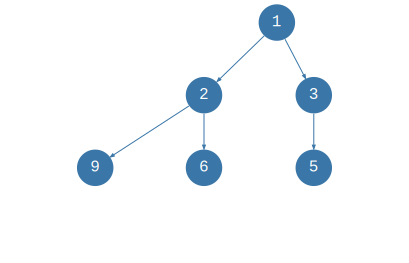

In [2]:
hp = Heap([2, 9, 3, 1, 6, 5])
tree = hp.make_tree()
tree.draw()

### 插入元素

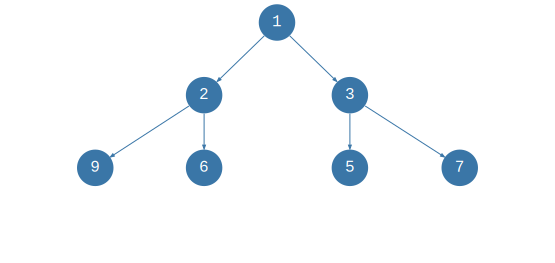

In [3]:
hp.insert(7)
tree = hp.make_tree()
tree.draw()

### 删除元素

一般是从顶端删除最小值（优先队列）。

1


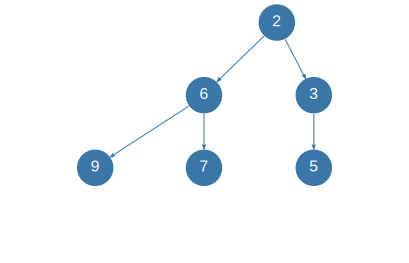

In [4]:
smallest = hp.pop()
print(smallest)
tree = hp.make_tree()
tree.draw()

## BST

满足：**`left < parent < right`**。

In [5]:
class BST(Tree2):
    def __ini__(self, data=None, left=None, right=None):
        super().__init__(data=data, left=left, right=right)
    def find(self, x, visit=None):
        if not visit:
            visit = type(self)._visit
        cursor = self
        while cursor:
            visit(cursor)
            if x > cursor.data:
                cursor = cursor.right
            elif x < cursor.data:
                cursor = cursor.left
            else:
                return cursor
        return None
    def find_max(self, visit=None):
        if not visit:
            visit = type(self)._visit
        cursor = self
        if cursor:
            while cursor.right:
                visit(cursor)
                cursor = cursor.right
        visit(cursor)
        return cursor
    def find_min(self, visit=None):
        if not visit:
            visit = type(self)._visit
        cursor = self
        if cursor:
            while cursor.left:
                visit(cursor)
                cursor = cursor.left
        visit(cursor)
        return cursor
    def insert(self, x):
        if x > self.data:
            # insert right
            if self.right:
                self.right.insert(x)
            else:
                self.right = BST(data=x)
        elif x < self.data:
            # insert left
            if self.left:
                self.left.insert(x)
            else:
                self.left = BST(data=x)
        else:
            # error
            print("Duplicate Element {}".format(x))
    def remove(self, x):
        queue = []
        visit = lambda q: lambda x: q.append(x)
        cursor = self.find(x, visit(queue))
        if not cursor:
            print("Element {} not found!".format(x))
            return None
        
        if len(queue) == 1:
            parent = None
        else:
            parent = queue[-2]
        
        if cursor.left is None:
            if parent.left == cursor:
                parent.left = cursor.right
            else:
                parent.right = cursor.right
        else:
            p = cursor
            lm = cursor.left
            while lm.right:
                p = lm
                lm = lm.right
            cursor.data = lm.data
            if p == cursor:
                cursor.left = lm.left
            else:
                p.right = lm.left

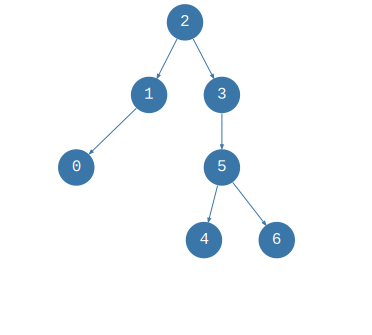

In [6]:
from Tree import visit, draw_edges
lst = [2, 1, 3, 0, 5, 6, 4]
tree = BST()
for i in lst:
    if tree.data is None:
        tree.data = i
    else:
        tree.insert(i)
tree_graph = tree.draw()
tree_graph

### 搜索

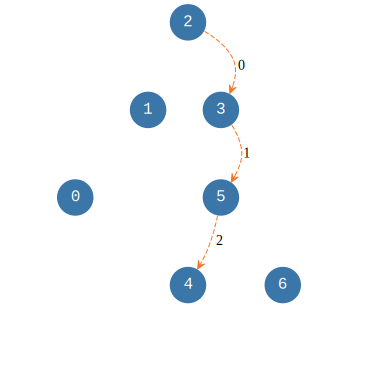

In [7]:
queue = []
tree.find(4, visit(queue))
draw_edges(tree, queue)

### 搜索最大值

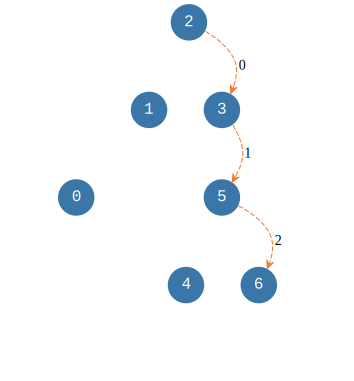

In [8]:
queue = []
tree.find_max(visit(queue))
draw_edges(tree, queue)

### 搜索最小值

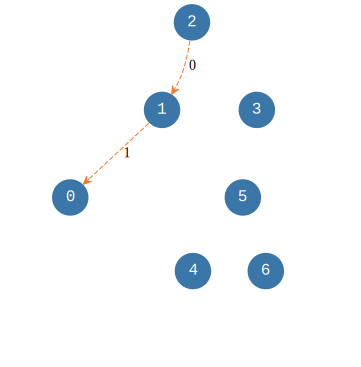

In [9]:
queue = []
tree.find_min(visit(queue))
draw_edges(tree, queue)

### 转化成排序列表

中序遍历。

In [10]:
tree.in_order_recursive()

0 1 2 3 4 5 6 

### 删除元素

Element 7 not found!


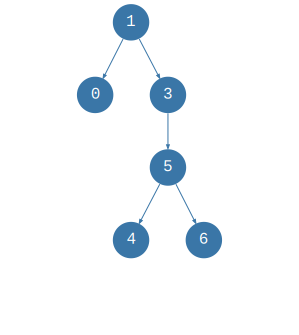

In [11]:
tree.remove(7)
tree.remove(2)
tree.draw()